In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import math, time, random, datetime
from sklearn.model_selection import train_test_split
from sklearn import model_selection,metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import cv

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [5]:
print(train_data.head())
print('\nSize of Training data : {}'.format(train_data.shape))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

S

In [6]:
print(test_data.head())
print('\n Size of testing data : {}'.format(test_data.shape))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

 Size of testing data : (418, 11)


In [7]:
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [8]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


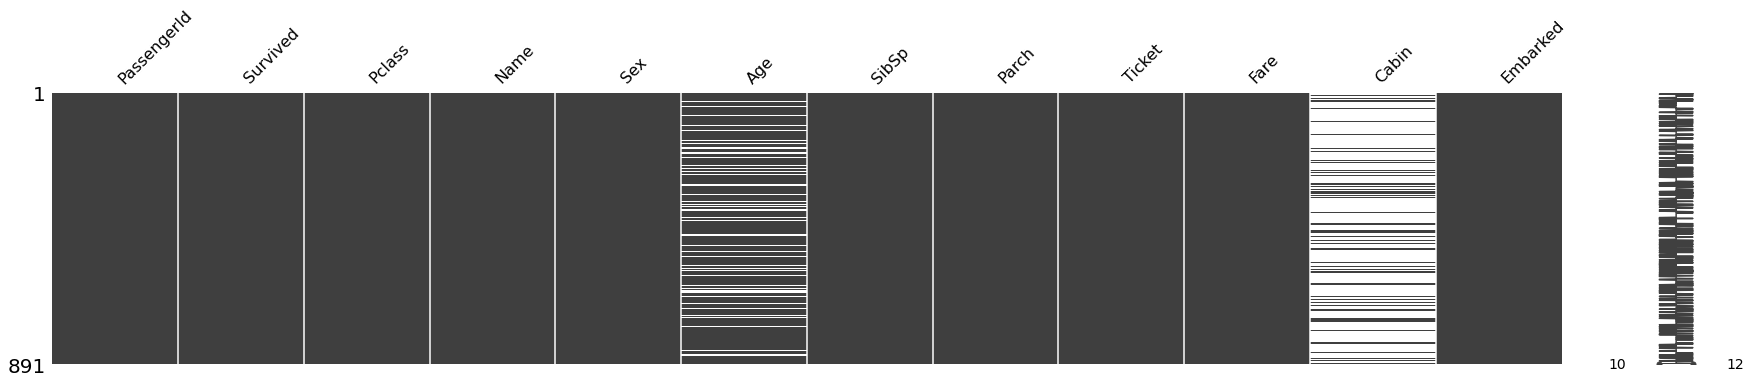

In [9]:
import missingno
missingno.matrix(train_data, figsize=(30,5))

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
disc_dataframe = pd.DataFrame()
cont_dataframe = pd.DataFrame()

0    549
1    342
Name: Survived, dtype: int64


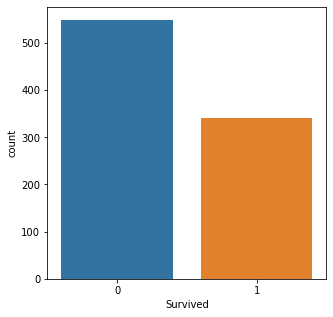

In [13]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'Survived', data=train_data)
print(train_data.Survived.value_counts())

In [14]:
disc_dataframe['Survived'] = train_data['Survived']
cont_dataframe['Survived'] = train_data['Survived']

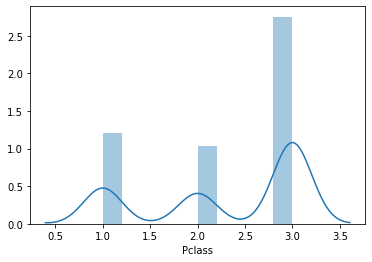

In [15]:
sns.distplot(train_data.Pclass)

In [16]:
disc_dataframe['Pclass'] = train_data['Pclass']
cont_dataframe['Pclass'] = train_data['Pclass']

male      577
female    314
Name: Sex, dtype: int64


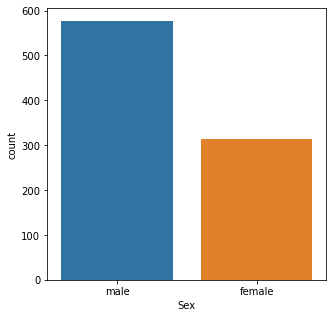

In [17]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=train_data)
print(train_data.Sex.value_counts())

In [18]:
disc_dataframe['Sex'] = train_data['Sex']
disc_dataframe['Sex'] = np.where(disc_dataframe['Sex'] == 'female',1,0)
# replace female with 1 and male with 0
cont_dataframe['Sex'] = train_data['Sex']

In [19]:
disc_dataframe.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


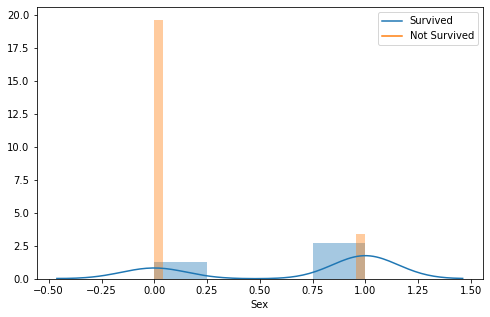

In [20]:
fig = plt.figure(figsize=(8,5))
sns.distplot(disc_dataframe.loc[disc_dataframe['Survived'] == 1]['Sex'], kde_kws = {'label' : 'Survived'})
sns.distplot(disc_dataframe.loc[disc_dataframe['Survived'] == 0]['Sex'], kde_kws = {'label' : 'Not Survived'})

In [21]:
# the age column is not added because of missing values
# fix it and then add to the two data frames

In [22]:
def plot_graphs(data, disc_dataframe, label_col, target_col, figsize=(20,5), use_disc_df=False):
    
    if use_disc_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(x = target_col, data = disc_dataframe)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_col] == 1][target_col], kde_kws={'label' : 'Survived'})
        sns.distplot(data.loc[data[label_col] == 0][target_col], kde_kws={'label' : 'Not Survived'})
        
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(x = target_col, data = data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_col] == 1][target_col], kde_kws={'label' : 'Survived'})
        sns.distplot(data.loc[data[label_col] == 0][target_col], kde_kws={'label' : 'Not Survived'})

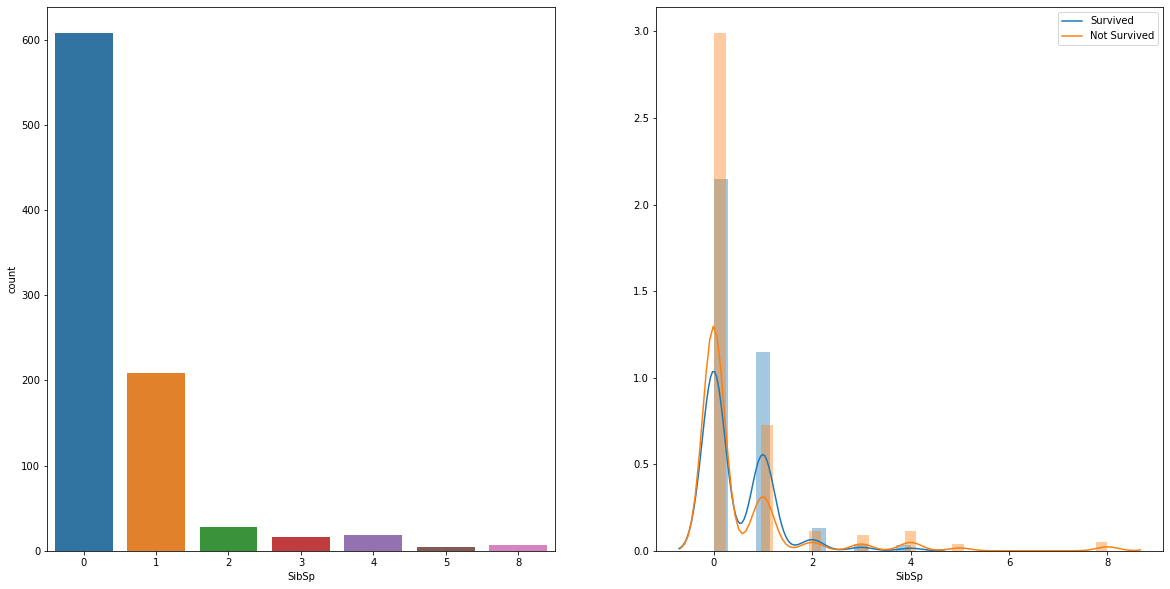

In [23]:
plot_graphs(train_data, disc_dataframe=disc_dataframe, label_col='Survived', target_col='SibSp', figsize=(20,10))

In [24]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
disc_dataframe['SibSp'] = train_data['SibSp']
cont_dataframe['SibSp'] = train_data['SibSp']

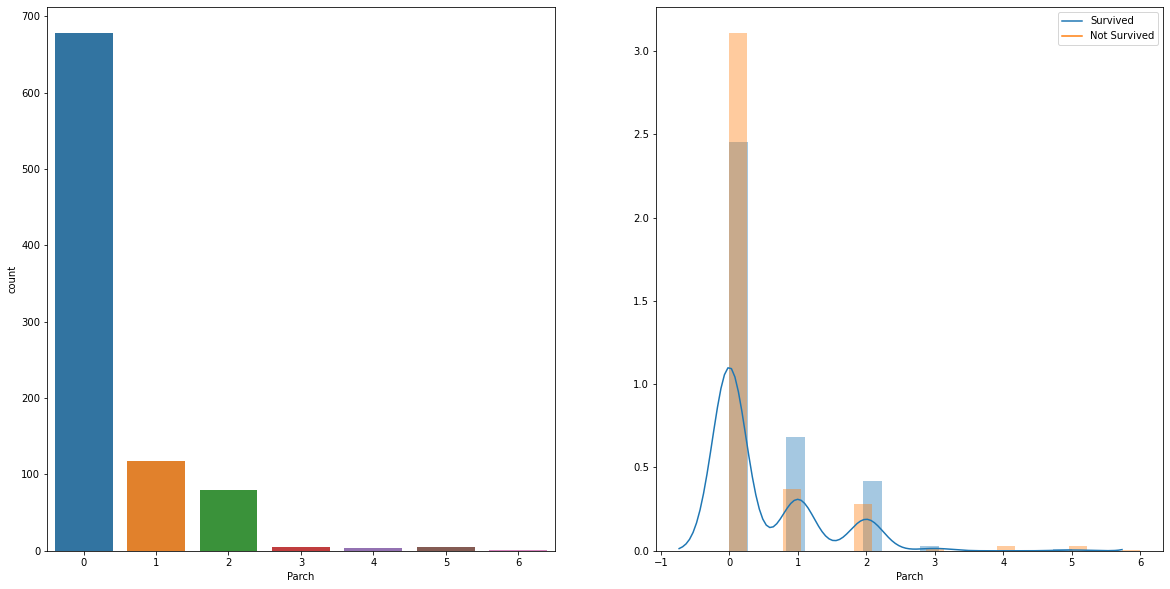

In [26]:
plot_graphs(train_data, disc_dataframe=disc_dataframe, label_col='Survived', target_col='Parch', figsize=(20,10))

In [27]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
disc_dataframe['Parch'] = train_data['Parch']
cont_dataframe['Parch'] = train_data['Parch']

In [29]:
print('Number of unique ticket values : {}'.format(len(train_data.Ticket.unique())))

Number of unique ticket values : 681


In [30]:
# There are a lot of unique ticket values to be displayed.
# This will also be dropped

In [31]:
print('Number of unique fare values : {}'.format(len(train_data.Fare.unique())))

Number of unique fare values : 248


In [32]:
# cont_dataframe['Fare'] = train_data['Fare']
# disc_dataframe['Fare'] = pd.cut(train_data['Fare'], bins=5)

In [33]:
# disc_dataframe.head()

In [34]:
# disc_dataframe.Fare.value_counts()

In [35]:
# plot_graphs(train_data, disc_dataframe,label_col='Survived',target_col='Fare',figsize=(20,10),use_disc_df=True)

In [36]:
train_data.Cabin.isnull().sum()

687

In [37]:
# Cabin has lot of missing values and we will drop it

In [38]:
print('Number of missing values in Embarked : {}'.format(train_data.Embarked.isnull().sum()))

Number of missing values in Embarked : 2


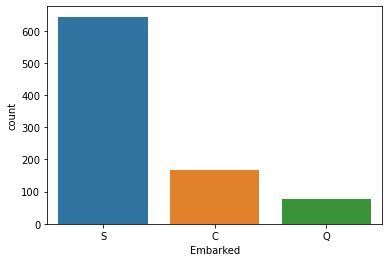

In [39]:
sns.countplot(x = 'Embarked', data = train_data)

In [40]:
disc_dataframe['Embarked'] = train_data['Embarked']
cont_dataframe['Embarked'] = train_data['Embarked']

In [41]:
# Let us drop two rows with missing values
print('Length before dropping : {}'.format(len(disc_dataframe)))
disc_dataframe = disc_dataframe.dropna(subset = ['Embarked'])
cont_dataframe = cont_dataframe.dropna(subset = ['Embarked'])
print('Length after dropping : {}'.format(len(cont_dataframe)))

Length before dropping : 891
Length after dropping : 889


In [42]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [43]:
# one hot encoding 
one_hot_cols = disc_dataframe.columns.tolist()
one_hot_cols.remove('Survived')
encoded_disc_dataframe = pd.get_dummies(disc_dataframe, columns=one_hot_cols)

In [44]:
encoded_disc_dataframe.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [45]:
embarked_one_hot = pd.get_dummies(cont_dataframe['Embarked'], prefix='embarked')
sex_one_hot = pd.get_dummies(cont_dataframe['Sex'], prefix='sex')
pclass_one_hot = pd.get_dummies(cont_dataframe['Pclass'], prefix='pclass')

In [46]:
encoded_cont_dataframe = pd.concat([cont_dataframe,
                                   embarked_one_hot,
                                   sex_one_hot,
                                   pclass_one_hot], axis=1)
encoded_cont_dataframe = encoded_cont_dataframe.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [47]:
encoded_cont_dataframe.head()

,Survived,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,1


In [48]:
selected_dataframe = encoded_cont_dataframe

In [49]:
selected_dataframe.head()

,Survived,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,1


In [50]:
x_train = selected_dataframe.drop('Survived', axis=1)
y_train = selected_dataframe.Survived

In [51]:
print('Shape of X train : {}\n'.format(x_train.shape))
print(x_train.head())

Shape of X train : (889, 10)

   SibSp  Parch  embarked_C  embarked_Q  embarked_S  sex_female  sex_male  \
0      1      0           0           0           1           0         1   
1      1      0           1           0           0           1         0   
2      0      0           0           0           1           1         0   
3      1      0           0           0           1           1         0   
4      0      0           0           0           1           0         1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         0         0         1  


In [52]:
print('Shape of Y train : {}\n'.format(y_train.shape))
print(y_train.head())

Shape of Y train : (889,)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [53]:
def fit_algorithm(algorithm, x_train, y_train, cv):
    model = algorithm.fit(x_train, y_train)
    accuracy = round(model.score(x_train, y_train) * 100, 2)
    predict_train = model_selection.cross_val_predict(algorithm,
                                                     x_train, y_train, cv=cv,
                                                     n_jobs = -1)
    val_acc = round(metrics.accuracy_score(y_train, predict_train)*100, 2)
    
    return accuracy, val_acc

In [54]:
# Logistic Regression
start_time = time.time()
acc_lr, val_acc_lr = fit_algorithm(LogisticRegression(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_lr)
print('Validation Accuracy : %s' %val_acc_lr)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 79.19
Validation Accuracy : 78.18
Time Taken : 0:00:02.436801


In [55]:
# K Nearest Neighbors
start_time = time.time()
acc_knn, val_acc_knn = fit_algorithm(KNeighborsClassifier(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_knn)
print('Validation Accuracy : %s' %val_acc_knn)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 82.23
Validation Accuracy : 80.09
Time Taken : 0:00:00.234586


In [56]:
# Gaussian Naive Bayes
start_time = time.time()
acc_gnb, val_acc_gnb = fit_algorithm(GaussianNB(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_gnb)
print('Validation Accuracy : %s' %val_acc_gnb)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 78.4
Validation Accuracy : 78.4
Time Taken : 0:00:00.101339


In [57]:
# Linear Support Vector Machine
start_time = time.time()
acc_svc, val_acc_svc = fit_algorithm(LinearSVC(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_svc)
print('Validation Accuracy : %s' %val_acc_svc)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 80.09
Validation Accuracy : 79.3
Time Taken : 0:00:00.257639


In [58]:
# Stochastic Gradient Descent
start_time = time.time()
acc_sgd, val_acc_sgd = fit_algorithm(SGDClassifier(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_sgd)
print('Validation Accuracy : %s' %val_acc_sgd)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 79.53
Validation Accuracy : 75.14
Time Taken : 0:00:00.095675


In [59]:
# Decision Tree Classifier
start_time = time.time()
acc_dtc, val_acc_dtc = fit_algorithm(DecisionTreeClassifier(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_dtc)
print('Validation Accuracy : %s' %val_acc_dtc)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 83.69
Validation Accuracy : 80.09
Time Taken : 0:00:00.105386


In [60]:
# Gradient Boost Trees
start_time = time.time()
acc_gbt, val_acc_gbt = fit_algorithm(GradientBoostingClassifier(), x_train, y_train, 10)
time_taken = time.time() - start_time

print('Accuracy : %s' % acc_gbt)
print('Validation Accuracy : %s' %val_acc_gbt)
print('Time Taken : %s' %datetime.timedelta(seconds = time_taken))

Accuracy : 82.56
Validation Accuracy : 79.53
Time Taken : 0:00:00.691601


In [61]:
models = pd.DataFrame({
    'Model' : ['KNearest Neighbors', 'Logistic Regression', 'Gradient Boosting Trees',
              'Decision Tree Classifier', 'Stochastic Gradient Descent', 'Linear SVC',
              'Gaussian Naive Bayes'],
    'Scores' : [acc_knn, acc_lr, acc_gbt, acc_dtc, acc_sgd, acc_svc, acc_gnb]
})
print('--- Accuracy Scores ---\n')
models.sort_values(by = 'Scores', ascending=False)

--- Accuracy Scores ---



,Model,Scores
3,Decision Tree Classifier,83.69
2,Gradient Boosting Trees,82.56
0,KNearest Neighbors,82.23
5,Linear SVC,80.09
4,Stochastic Gradient Descent,79.53
1,Logistic Regression,79.19
6,Gaussian Naive Bayes,78.40


In [62]:
models = pd.DataFrame({
    'Model' : ['KNearest Neighbors', 'Logistic Regression', 'Gradient Boosting Trees',
              'Decision Tree Classifier', 'Stochastic Gradient Descent', 'Linear SVC',
              'Gaussian Naive Bayes'],
    'Scores' : [val_acc_knn, val_acc_lr, val_acc_gbt, val_acc_dtc, val_acc_sgd, val_acc_svc, val_acc_gnb]
})
print('--- Validation Accuracy Scores ---\n')
models.sort_values(by = 'Scores', ascending=False)

--- Validation Accuracy Scores ---



,Model,Scores
0,KNearest Neighbors,80.09
3,Decision Tree Classifier,80.09
2,Gradient Boosting Trees,79.53
5,Linear SVC,79.30
6,Gaussian Naive Bayes,78.40
1,Logistic Regression,78.18
4,Stochastic Gradient Descent,75.14


In [63]:
# From the scores we select Gradient Boosting Classifer
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [64]:
# Feature Importance
def feature_importance(model, data):
    important_features = pd.DataFrame({'imp' : model.feature_importances_, 'cols' : data.columns})
    important_features = important_features.sort_values(['imp','cols'], ascending=[True,False]).iloc[-30:]
    _ = important_features.plot(kind='barh', x='cols', y='imp', figsize=(8,8))
    return important_features

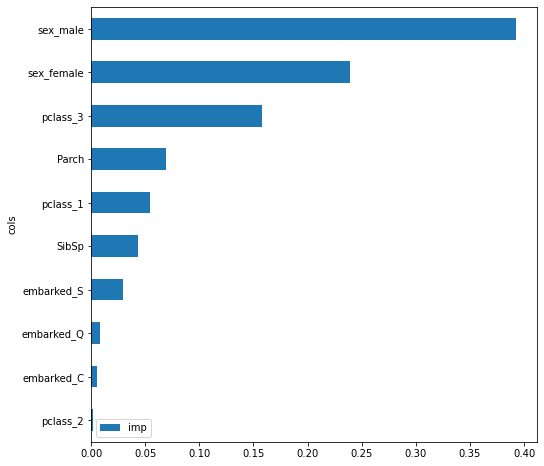

In [65]:
important_features = feature_importance(gbc, x_train)

In [66]:
# Preparing the submission
test_embarked_one_hot = pd.get_dummies(test_data['Embarked'], prefix='embarked')
test_sex_one_hot = pd.get_dummies(test_data['Sex'], prefix='sex')
test_pclass_one_hot = pd.get_dummies(test_data['Pclass'], prefix='pclass')

In [67]:
test_data = pd.concat([test_data, 
                      test_embarked_one_hot,
                      test_sex_one_hot,
                      test_pclass_one_hot], axis=1)

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [69]:
wanted_test_cols = x_train.columns
wanted_test_cols

Index(['SibSp', 'Parch', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [70]:
print(test_data.SibSp.isnull().sum())
print(test_data.Parch.isnull().sum())
print(test_data.Fare.isnull().sum())

0
0
1


In [71]:
predictions = gbc.predict(test_data[wanted_test_cols])

In [72]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [75]:
testing_submission = pd.DataFrame()
testing_submission['PassengerId'] = test_data['PassengerId']
testing_submission['Survived'] = predictions
testing_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [76]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [77]:
print(len(testing_submission))
print(len(test_data))

418
418


In [78]:
testing_submission.to_csv('submission.csv', index=False)
print('Submission CSV is ready')

Submission CSV is ready
